Let's begin.

In [74]:
import os, numpy as np, pandas as pd
raw_data_path=os.path.join(os.path.pardir,'data','raw','Absenteeism_at_work.csv')

Load the data

In [75]:
df=pd.read_csv(raw_data_path,sep=';')

In [76]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [77]:
df_t=df.iloc[1:178]

In [78]:
df_t.to_csv('test.csv',sep=';',index=False)

First let's look at the structure of the data.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

No Missing Values so we can move forward. Let's define the numerical and categorical columns.

In [80]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [81]:
cat_cols=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Education','Son', 'Pet']
num_cols=[ 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Social drinker',
       'Social smoker', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

In [82]:
# Helps view complete data
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [83]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


As the ID column simply identifies the person and our analysis is not fixed on the people so we can remove the ID column from the data

In [84]:
df.drop(['ID'],axis=1,inplace=True)
cat_cols.remove('ID')

In [85]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Lets look at the class distributions of the categorical variables

In [86]:
for i in cat_cols:
    print(df[i].value_counts())

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64
4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64
1    611
3     79
2     46
4      4
Name: Education, dtype: int64
0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64
0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64


As we see the Month of absence has value 0 for 3 observations, which is outside the scope of the variable. Thus we remove these observations from our analysis. In Reason for absence the value 0 is also out of the scope of the variable but that can mean reason was not listed and so it was put to be 0.

In [87]:
df=df[df['Month of absence']!=0]

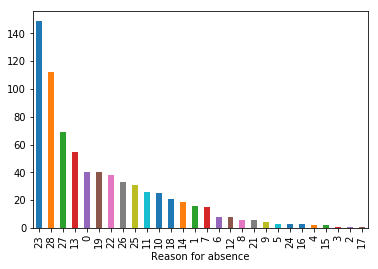

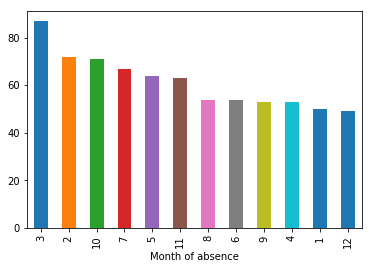

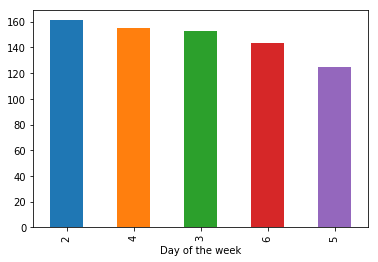

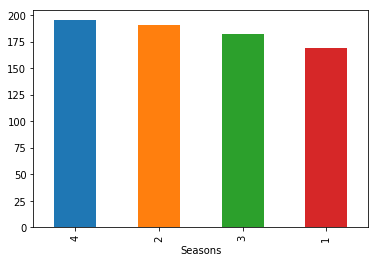

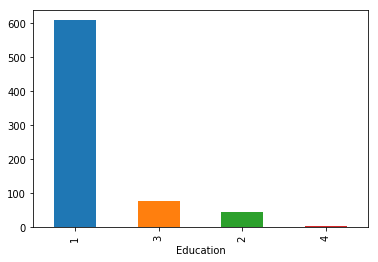

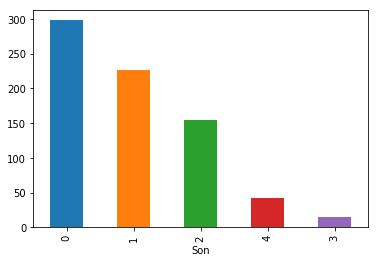

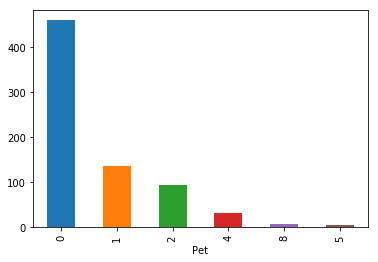

In [88]:
import matplotlib.pyplot as plt
for i in cat_cols:
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

Reason for absence is a nominal qualitative variable with 28 categories, we can group these 28 categories into 4 main categories as reasons 1-14 are common diseases, 15-18 are pregnancy related issues, 19-21 are related to poisoning and death, and 22-28 are appointment related. 0 being none of the reasons. So lets convert the 28 category variable into 5 categories. In case of Education, we see that majority of the observations are 1 and other observation can be grouped together. Similarly for Pets most of the individuals have 0 pets so we can convert the values greater than 0 to represent having a pet and 0 to not having a pet. For Son, we see that 2 or more children are rarely present so we can represent 2 or more children with 1 and less 2 children with 0.

In [89]:
df.loc[df['Reason for absence'].isin(range(1,15)),'Reason for absence']=1
df.loc[df['Reason for absence'].isin(range(15,19)),'Reason for absence']=2
df.loc[df['Reason for absence'].isin(range(19,22)),'Reason for absence']=3
df.loc[df['Reason for absence'].isin(range(22,29)),'Reason for absence']=4


C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [90]:
df.Education=df.Education.map({1:0,2:1,3:1,4:1})
df.Pet=df.Pet.map({0:0,1:1,2:1,4:1,5:1,8:1})
df.Son=df.Son.map({0:0,1:0,2:1,3:1,4:1})

C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [91]:
df['Reason for absence'].value_counts()

4    435
1    189
3     46
0     40
2     27
Name: Reason for absence, dtype: int64

Let's look at the final bars for the categorical variables

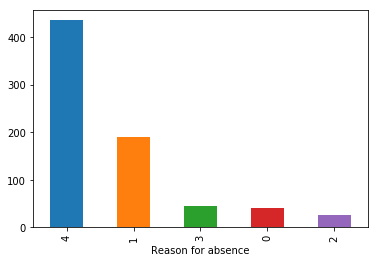

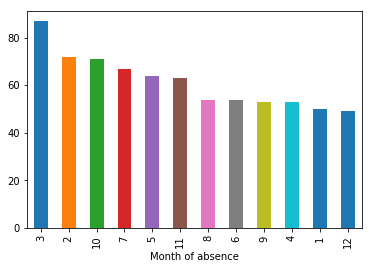

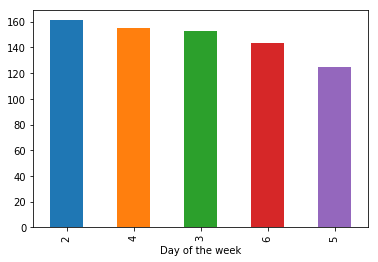

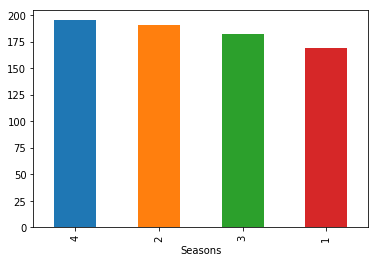

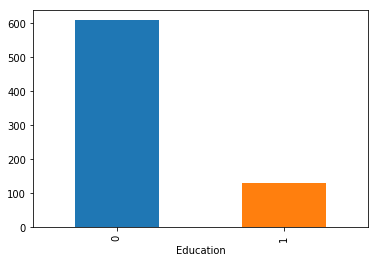

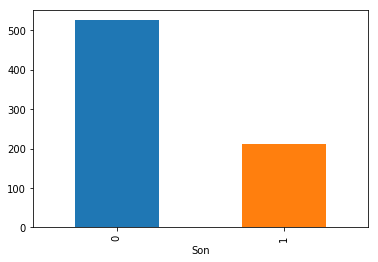

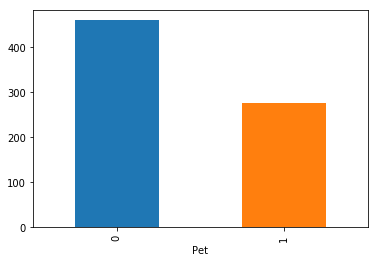

In [92]:
import matplotlib.pyplot as plt
for i in cat_cols:
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

Now lets look at the histograms for each numerical variable.

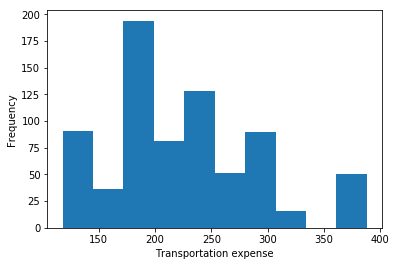

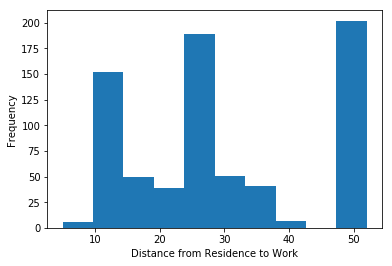

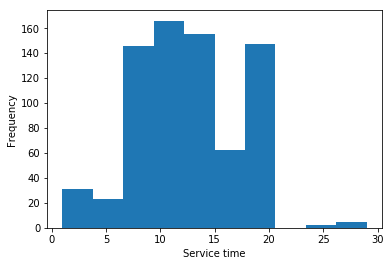

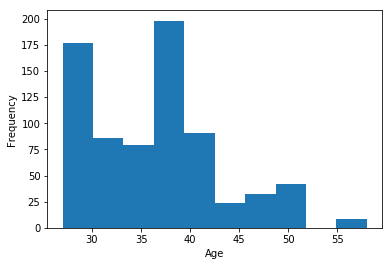

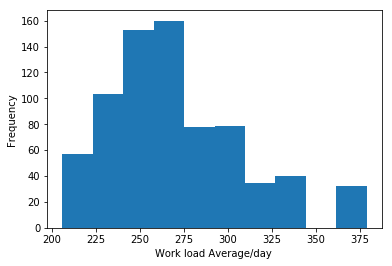

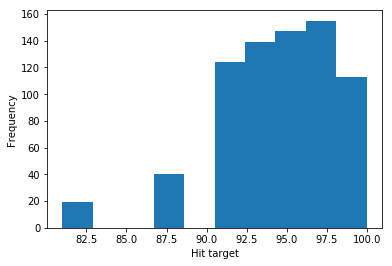

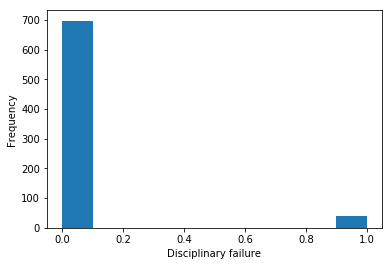

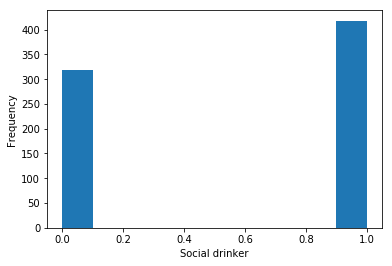

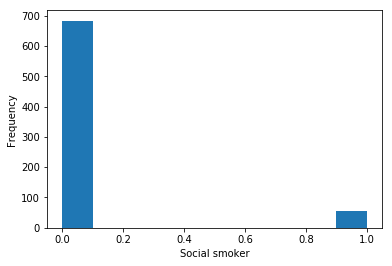

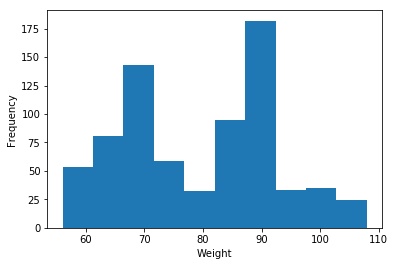

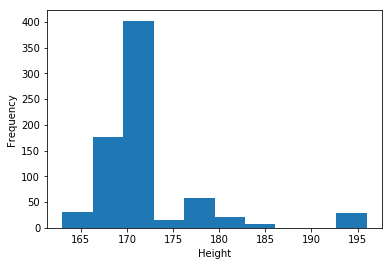

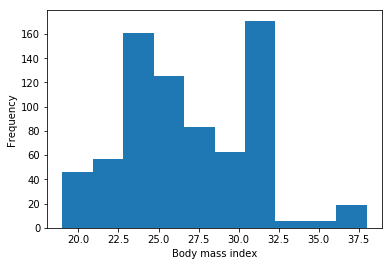

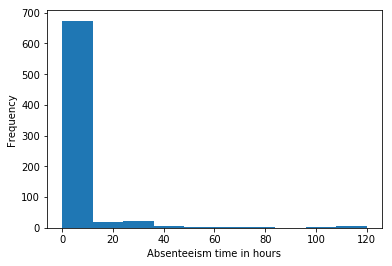

In [93]:
for i in num_cols:
    df[i].plot(kind='hist')
    plt.xlabel(i)
    plt.show()

Looks like some outliers are present in the variables. Let's construct boxplots to find the outliers

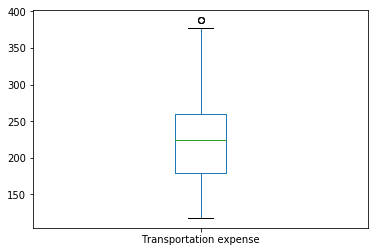

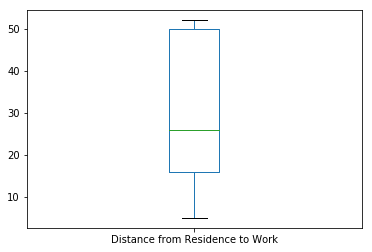

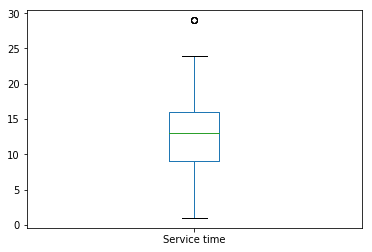

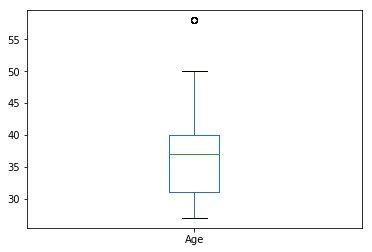

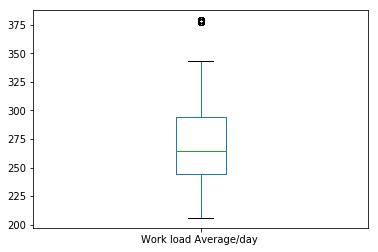

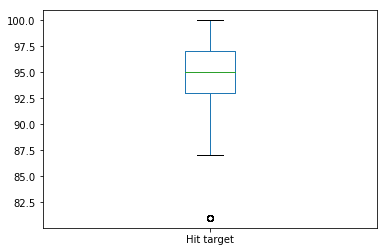

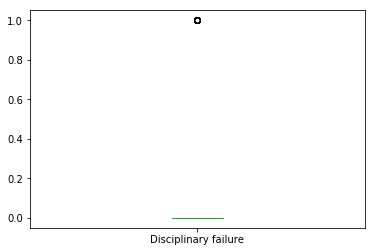

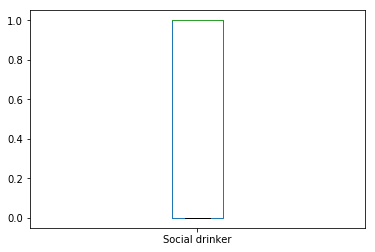

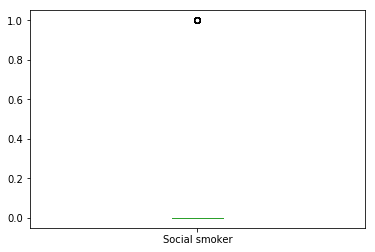

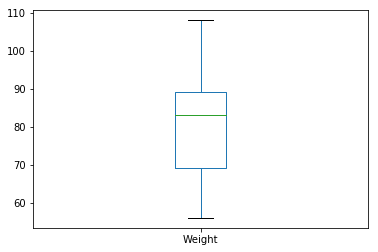

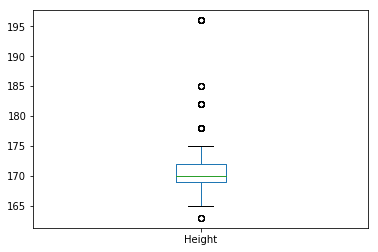

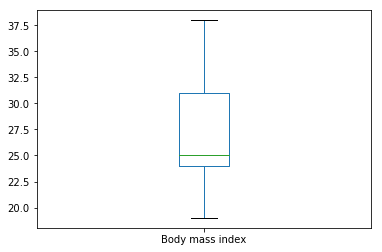

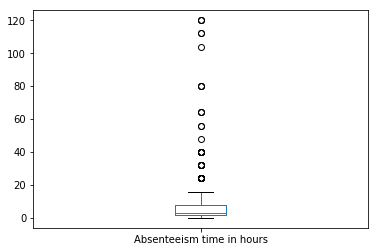

In [94]:
for i in num_cols:
    df[i].plot(kind='box')
    plt.show()

Now we see the clear presence of outliers so we treat them in the next section.

In [95]:
import fancyimpute
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            median=np.median(df_o[i])
            std=np.std(df_o[i])
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        if(missing_val.sum()>0):
            df_o[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 3).complete(df_o[num_cols]), columns = num_cols)
#             for i in num_cols:
#                 if len(df_o[df_o[i].isnull()])>0:
#                     df_o.loc[df_o[i].isnull(),i]=np.mean(df_o[i])
        else:
            break
    return df_o
df_o=outlier_imputer(df,num_cols)

C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Imputing row 1/737 with 0 missing, elapsed time: 0.134
Imputing row 101/737 with 1 missing, elapsed time: 0.139
Imputing row 201/737 with 1 missing, elapsed time: 0.151
Imputing row 301/737 with 1 missing, elapsed time: 0.152
Imputing row 401/737 with 1 missing, elapsed time: 0.163
Imputing row 501/737 with 0 missing, elapsed time: 0.166
Imputing row 601/737 with 0 missing, elapsed time: 0.167
Imputing row 701/737 with 0 missing, elapsed time: 0.175


C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [96]:
df['Utilization']=(df['Service time']-df['Absenteeism time in hours'])/df['Service time']

C:\Users\ytnvj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
df.Utilization

0      0.692308
1      1.000000
2      0.888889
3      0.714286
4      0.846154
5      0.888889
6     -1.666667
7      0.636364
8      0.662674
9      0.428571
10     0.272727
11     0.272727
12     0.272727
13     0.944444
14     0.777778
15     0.500000
16     0.888889
17     0.555556
18     0.384615
19     0.857143
20    -1.000000
21     0.944444
22    -0.777778
23     0.636364
24     0.384615
25    -1.333333
26     0.923077
27     0.333333
28     0.384615
29     0.888889
30     0.555556
31     0.333333
32     0.714286
33     0.333333
34     0.888889
35     0.666667
36     0.384615
37     0.666667
38     0.333333
39     0.636364
40     0.714286
41     0.600000
42     0.777778
43     0.384615
44     0.857143
45     0.700000
46     0.833333
47     0.666667
48     0.272727
49     0.666667
50     1.000000
51     1.000000
52     0.777778
53     0.800000
54     1.000000
55     1.000000
56     0.666667
57     0.833333
58     1.000000
59     0.928571
60     0.833333
61     0.636364
62     0

In [106]:
month_utilization=[]
for i in df['Month of absence'].unique():
    month_utilization.append([i,df.loc[df['Month of absence']==i,'Utilization'].mean()])

In [116]:
month_util=pd.DataFrame(month_utilization,columns=['Month','Utilization'])

In [119]:
month_util=month_util.sort_values(by='Month')

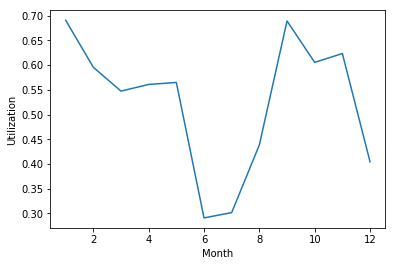

In [121]:
sns.lineplot(x=month_util['Month'],y=month_util['Utilization'])

In [122]:
month_util['Utilization'].mean()

0.5260173275093232

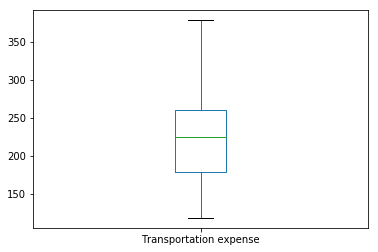

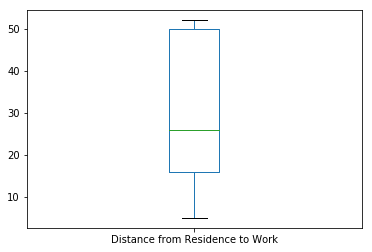

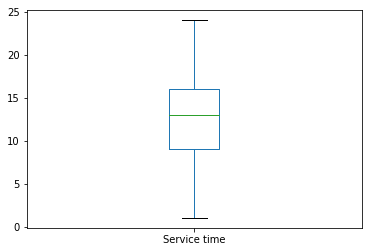

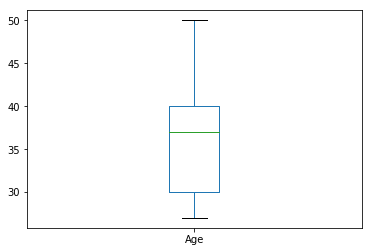

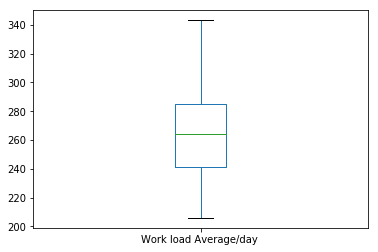

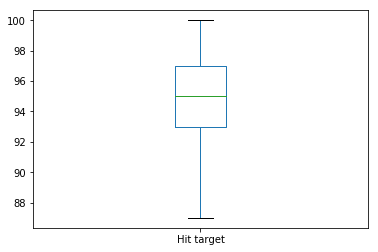

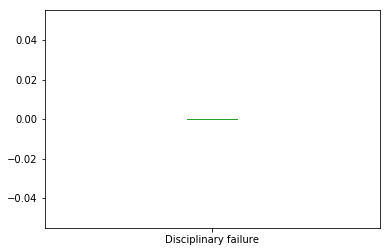

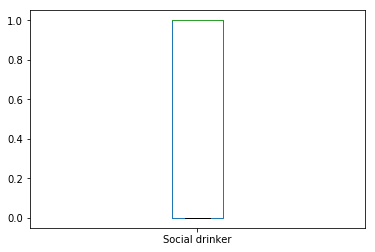

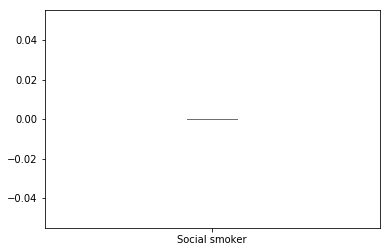

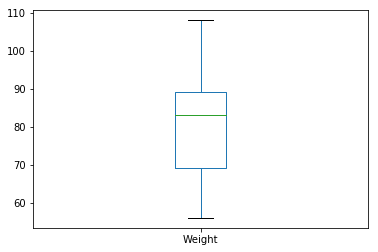

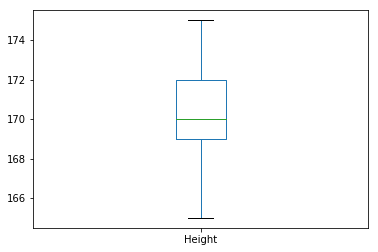

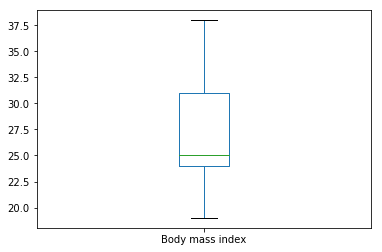

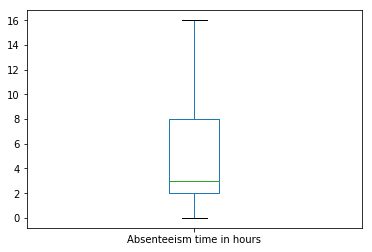

In [29]:
for i in num_cols:
    df_o[i].plot(kind='box')
    plt.show()

In [30]:
df_o.describe(include='all')

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.0,737.000000,737.000000,737.000000,737.0,737.000000,737.000000,737.000000,737.000000,737.000000
mean,2.877883,6.350068,3.913161,2.546811,220.751516,29.624152,12.440977,36.097086,266.668779,94.930128,0.0,0.175034,0.287653,0.567164,0.0,0.375848,78.983718,170.278477,26.658073,4.355630
std,1.459140,3.419430,1.422090,1.112329,66.204800,14.843701,4.177398,6.107114,32.243897,3.091236,0.0,0.380254,0.452976,0.495805,0.0,0.484670,12.866993,1.942128,4.274201,3.406674
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,87.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,56.000000,164.999994,19.000000,0.000000
25%,1.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,30.000000,241.476000,93.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,69.000000,169.000000,24.000000,2.000000
50%,4.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,83.000000,170.000000,25.000000,3.000000
75%,4.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284.853000,97.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,89.000000,172.000000,31.000000,8.000000
max,4.000000,12.000000,6.000000,4.000000,378.000000,52.000000,24.000000,50.000000,343.253000,100.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,108.000000,175.000007,38.000000,16.000000


Now that we have treated the outliers, let's look at correlation between the numerical features.

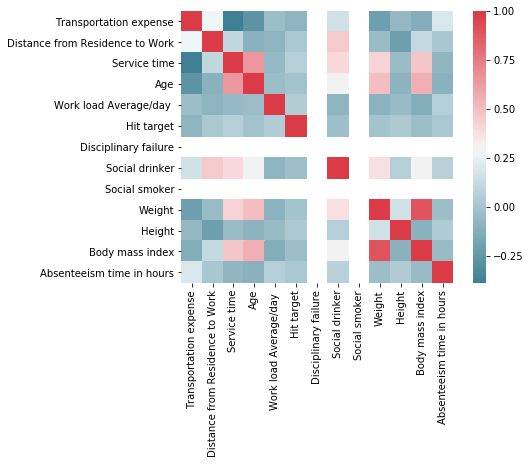

In [31]:
import seaborn as sns
def feature_selection(df,num_cols):
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(7, 5))
    #Generate correlation matrix
    corr = df[num_cols].corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    return df
df_o=feature_selection(df_o,num_cols)

As weight and body mass index are correlated and Service time and Age are correlated we can remove one of each. Let's remove Weight and Age. Moreover, as Disciplinary Failure and Social Smoker are constant we can remove them as well.

In [32]:
df_f=df_o.drop(['Weight','Age','Social smoker','Disciplinary failure'],axis=1)

In [33]:
cat_cols

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Education',
 'Son',
 'Pet']

In [34]:
df_f.describe(include='all')

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Education,Son,Social drinker,Pet,Height,Body mass index,Absenteeism time in hours
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,2.877883,6.350068,3.913161,2.546811,220.751516,29.624152,12.440977,266.668779,94.930128,0.175034,0.287653,0.567164,0.375848,170.278477,26.658073,4.355630
std,1.459140,3.419430,1.422090,1.112329,66.204800,14.843701,4.177398,32.243897,3.091236,0.380254,0.452976,0.495805,0.484670,1.942128,4.274201,3.406674
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,205.917000,87.000000,0.000000,0.000000,0.000000,0.000000,164.999994,19.000000,0.000000
25%,1.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,241.476000,93.000000,0.000000,0.000000,0.000000,0.000000,169.000000,24.000000,2.000000
50%,4.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,264.249000,95.000000,0.000000,0.000000,1.000000,0.000000,170.000000,25.000000,3.000000
75%,4.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,284.853000,97.000000,0.000000,1.000000,1.000000,1.000000,172.000000,31.000000,8.000000
max,4.000000,12.000000,6.000000,4.000000,378.000000,52.000000,24.000000,343.253000,100.000000,1.000000,1.000000,1.000000,1.000000,175.000007,38.000000,16.000000


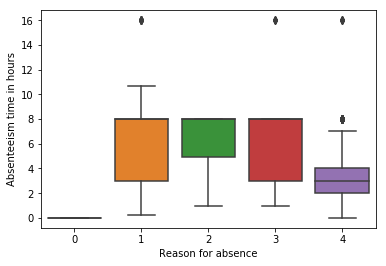

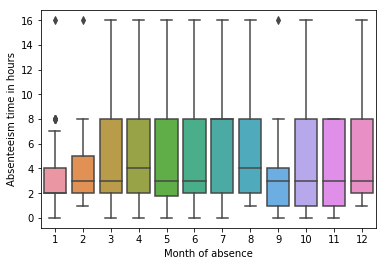

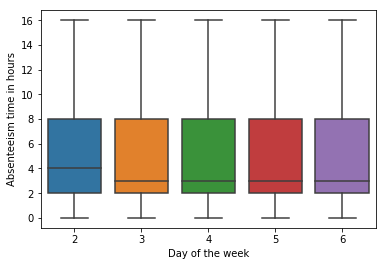

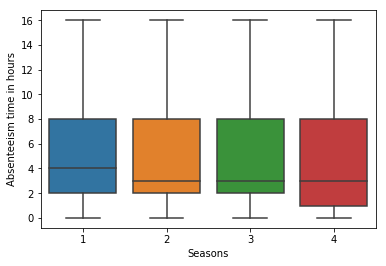

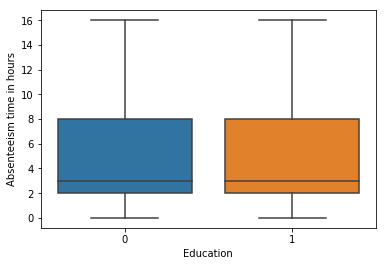

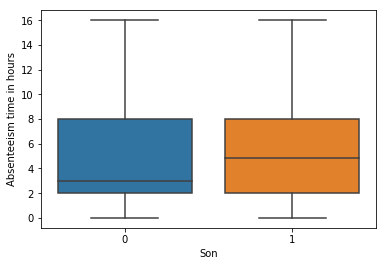

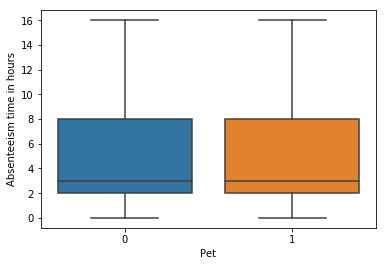

In [35]:
for i in cat_cols:
    sns.boxplot(x=df_f[i],y=df_f['Absenteeism time in hours'])
    plt.show()

As we see that boxplots of Pet and Education wrt Absenteeism are same for all the categories so we can drop Education and Pet from the data as well.

In [36]:
df_f_c=df_f.drop(['Education','Pet'],axis=1)
cat_cols.remove('Education')
cat_cols.remove('Pet')

Let's look at scatter plots of numerical variables wrt Absenteeism.

In [37]:
df_f_c.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Hit target', 'Son',
       'Social drinker', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [38]:
num_cols.remove('Age')
num_cols.remove('Weight')
num_cols.remove('Social smoker')
num_cols.remove('Disciplinary failure')

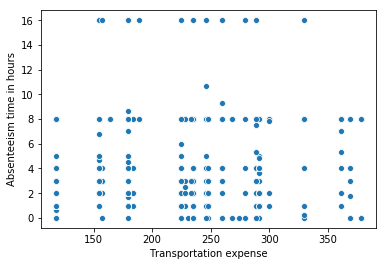

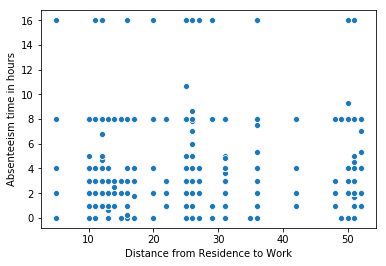

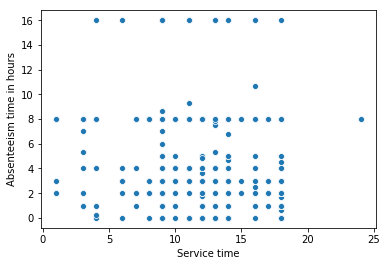

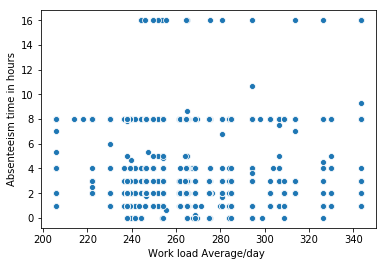

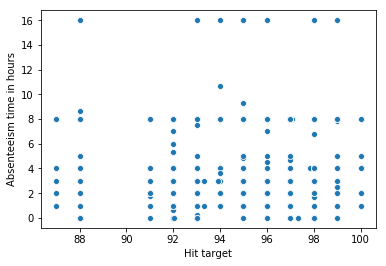

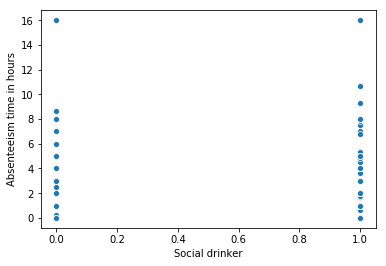

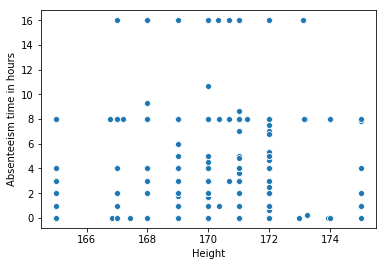

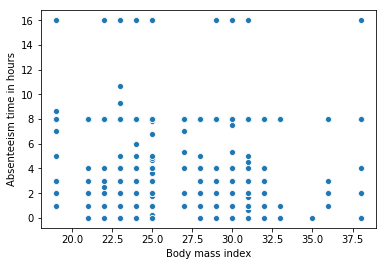

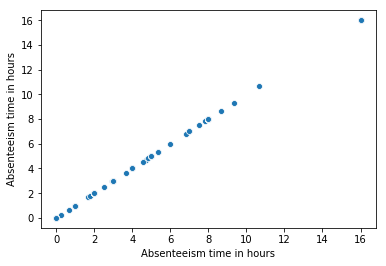

In [39]:
for i in num_cols:
    sns.scatterplot(x=df[i],y=df['Absenteeism time in hours'])
    plt.show()

Now Let's get the dummies for the categorical variables. In this case, only Reason for absence will be used to get the dummies as other categorical columns are ordinal i.e. they can be ordered.

In [40]:
df_f_c_d=pd.get_dummies(df_f_c,columns=['Reason for absence'],drop_first=True)

In [41]:
df_f_c_d=df_f_c_d[['Reason for absence_1', 'Reason for absence_2', 'Reason for absence_3', 'Reason for absence_4',
                   'Month of absence', 'Day of the week', 'Seasons','Transportation expense', 'Distance from Residence to Work',
                   'Service time', 'Work load Average/day ', 'Hit target', 'Son','Social drinker', 'Height', 'Body mass index', 
                   'Absenteeism time in hours']]

In [42]:
df_f_c_d.head()

,Reason for absence_1,Reason for absence_2,Reason for absence_3,Reason for absence_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Son,Social drinker,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289.0,36.0,13.0,239.554,97.0,1,1.0,172.000000,30.0,4.0
1,0,0,0,0,7,3,1,118.0,13.0,18.0,239.554,97.0,0,1.0,172.000009,31.0,0.0
2,0,0,0,1,7,4,1,179.0,51.0,18.0,239.554,97.0,0,1.0,170.000000,31.0,2.0
3,1,0,0,0,7,5,1,279.0,5.0,14.0,239.554,97.0,1,1.0,168.000000,24.0,4.0
4,0,0,0,1,7,5,1,289.0,36.0,13.0,239.554,97.0,1,1.0,172.000000,30.0,2.0


Now that the data has been processed let's write it to the processed folder.

In [43]:
df_f_c_d.to_csv(os.path.join(os.path.pardir,'data','processed','Absenteeism_processed.csv'))

Script to makeprocessed data.

In [50]:

import os, numpy as np, pandas as pd
import fancyimpute
def read_data():
    raw_data_path=os.path.join(os.path.pardir,'data','raw','Absenteeism_at_work.csv')
    df=pd.read_csv(raw_data_path,sep=';')
    cat_cols=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
           'Seasons', 'Education','Son', 'Pet']
    num_cols=[ 'Transportation expense', 'Distance from Residence to Work',
           'Service time', 'Age', 'Work load Average/day ', 'Hit target',
           'Disciplinary failure', 'Social drinker',
           'Social smoker', 'Weight', 'Height', 'Body mass index',
           'Absenteeism time in hours']
    return df,cat_cols,num_cols
def process_data(df,num_cols):
    return (df.pipe(change_categories).
            pipe(outlier_imputer,num_cols=num_cols).
            drop(['ID','Weight','Age','Social smoker','Disciplinary failure','Education','Pet'],axis=1).
            pipe(pd.get_dummies,columns=['Reason for absence'],drop_first=True)
           )
def change_categories(df):
    df.loc[df['Reason for absence'].isin(range(1,15)),'Reason for absence']=1
    df.loc[df['Reason for absence'].isin(range(15,19)),'Reason for absence']=2
    df.loc[df['Reason for absence'].isin(range(19,22)),'Reason for absence']=3
    df.loc[df['Reason for absence'].isin(range(22,29)),'Reason for absence']=4
    df.Education=df.Education.map({1:0,2:1,3:1,4:1})
    df.Pet=df.Pet.map({0:0,1:1,2:1,4:1,5:1,8:1})
    df.Son=df.Son.map({0:0,1:0,2:1,3:1,4:1})
    df=df[df['Month of absence']!=0]
    return df
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            median=np.median(df_o[i])
            std=np.std(df_o[i])
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        if(missing_val.sum()>0):
            df_o[num_cols]=pd.DataFrame(fancyimpute.KNN(k = 3).complete(df_o[num_cols]), columns = num_cols)
#             for i in num_cols:
#                 if len(df_o[df_o[i].isnull()])>0:
#                     df_o.loc[df_o[i].isnull(),i]=np.mean(df_o[i])
        else:
            break
    return df_o
def write_data(df):
    df=df[['Reason for absence_1', 'Reason for absence_2', 'Reason for absence_3', 'Reason for absence_4',
           'Month of absence', 'Day of the week', 'Seasons','Transportation expense', 'Distance from Residence to Work',
           'Service time', 'Work load Average/day ', 'Hit target', 'Son','Social drinker', 'Height', 'Body mass index', 
           'Absenteeism time in hours']]
    processed_path=os.path.join(os.path.pardir,'data','processed','absenteeism_processed.csv')
    df.to_csv(processed_path)
    
if __name__=='__main__':
    df,cat_cols,num_cols=read_data()
    df=process_data(df,num_cols)
    write_data(df)



C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Imputing row 1/737 with 0 missing, elapsed time: 0.080
Imputing row 101/737 with 1 missing, elapsed time: 0.081
Imputing row 201/737 with 1 missing, elapsed time: 0.082
Imputing row 301/737 with 1 missing, elapsed time: 0.084
Imputing row 401/737 with 1 missing, elapsed time: 0.085
Imputing row 501/737 with 0 missing, elapsed time: 0.086
Imputing row 601/737 with 0 missing, elapsed time: 0.086
Imputing row 701/737 with 0 missing, elapsed time: 0.087


C:\Users\ytnvj\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


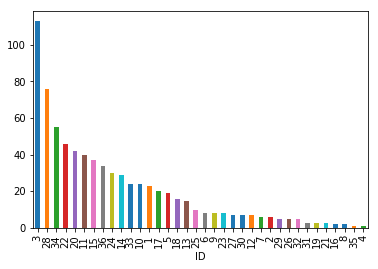

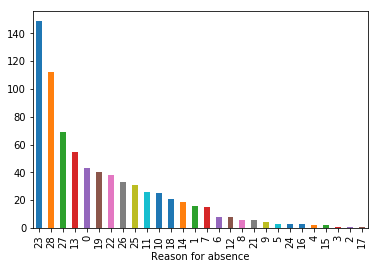

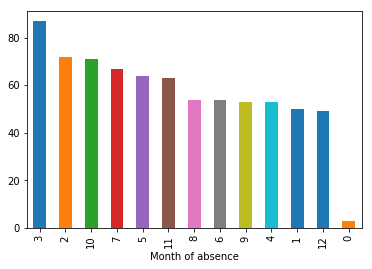

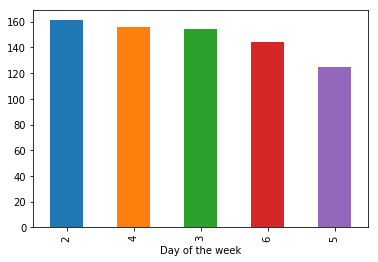

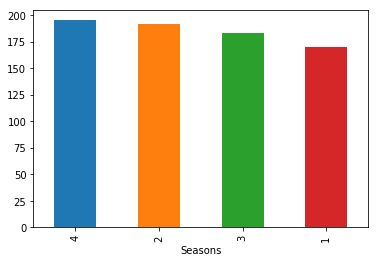

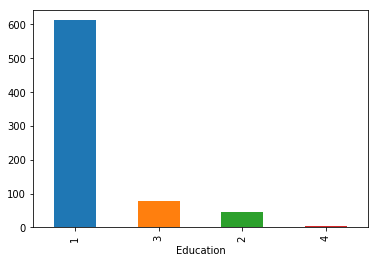

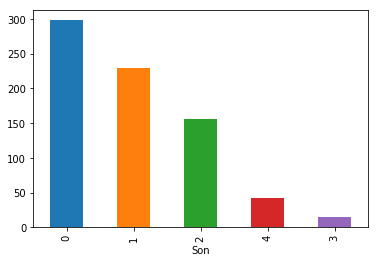

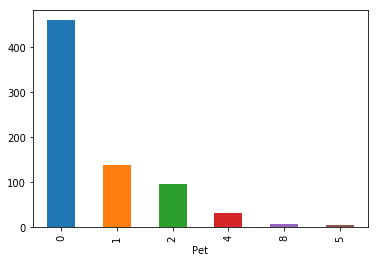

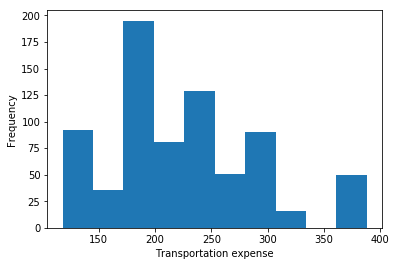

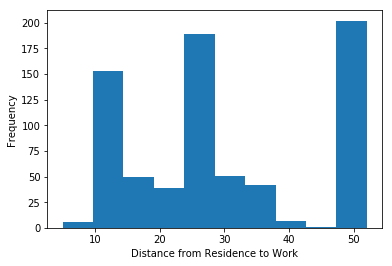

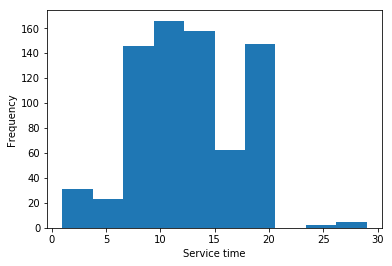

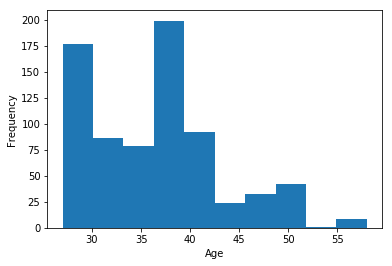

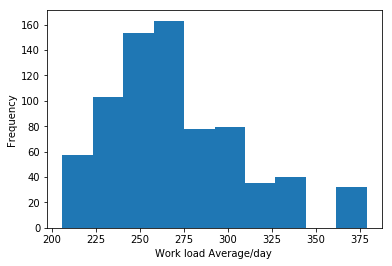

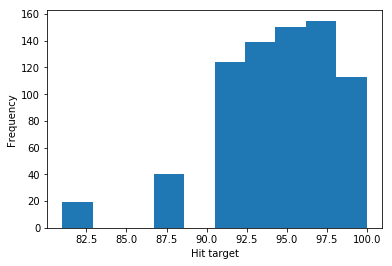

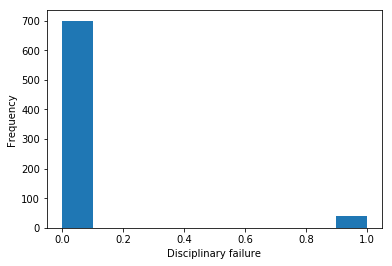

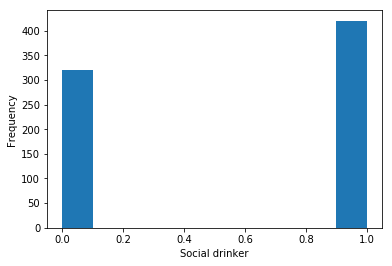

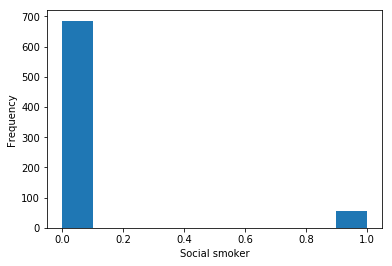

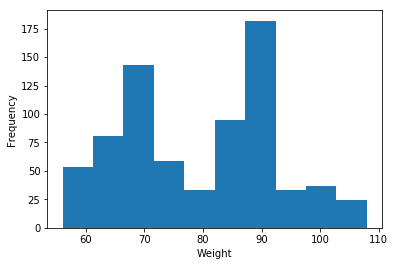

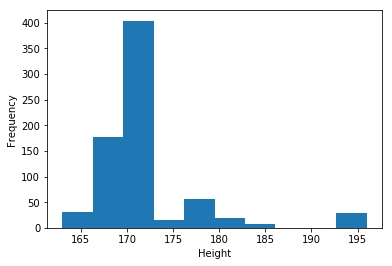

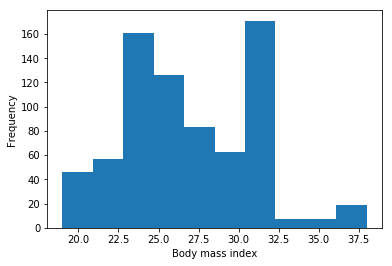

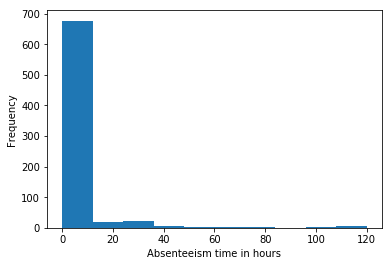

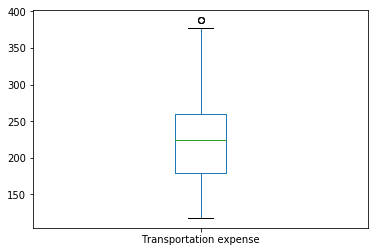

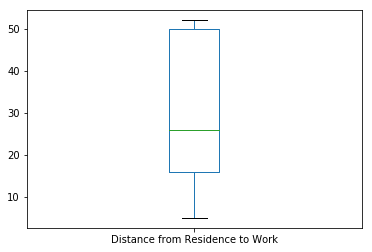

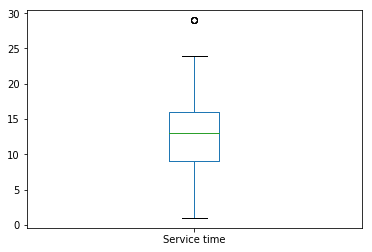

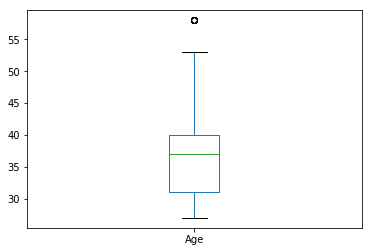

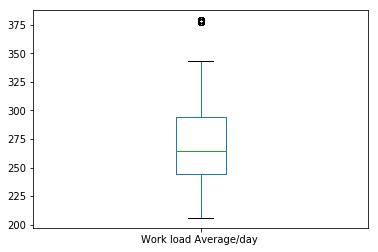

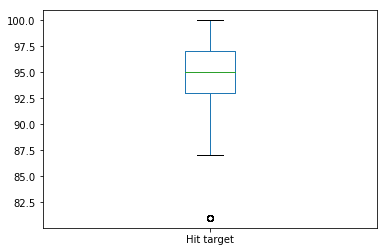

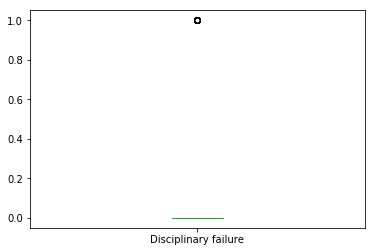

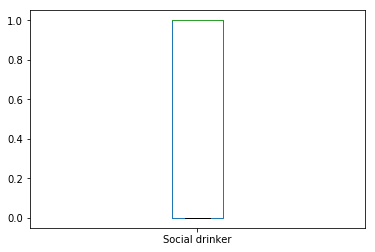

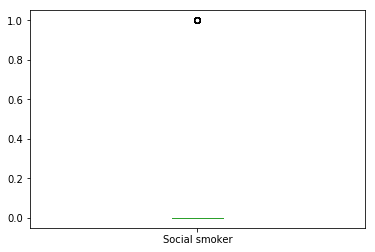

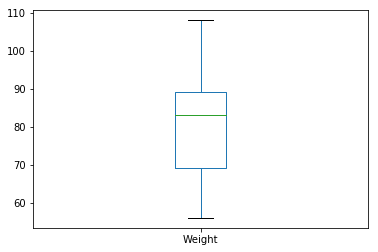

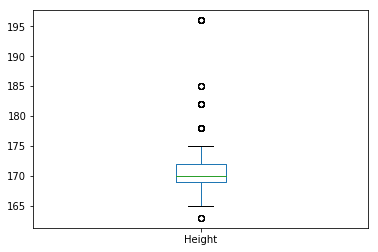

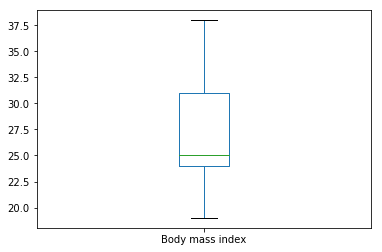

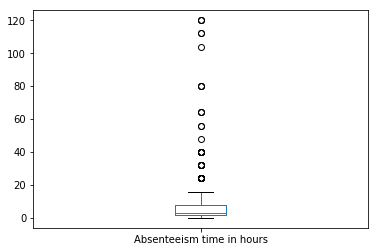

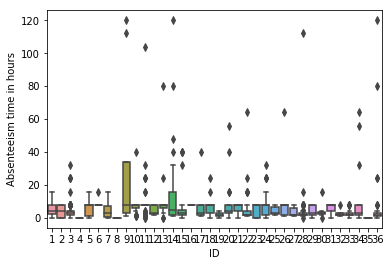

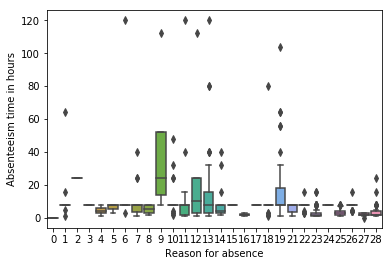

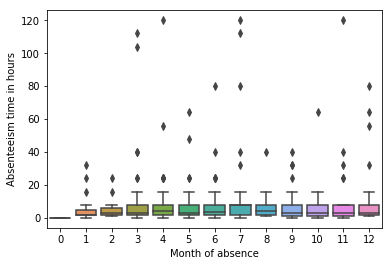

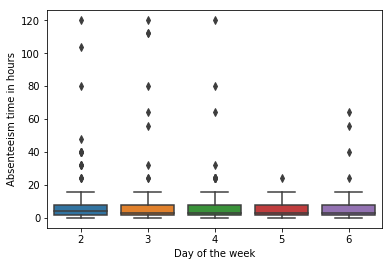

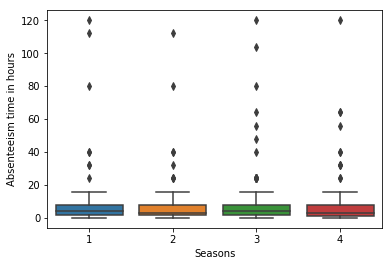

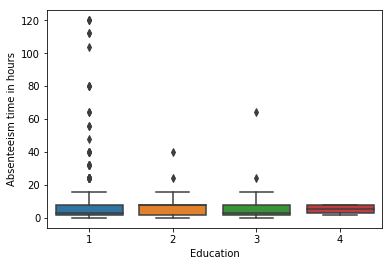

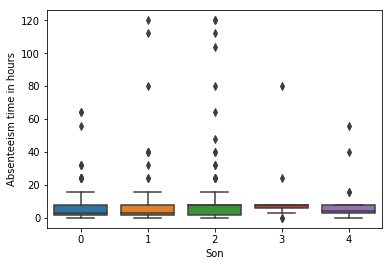

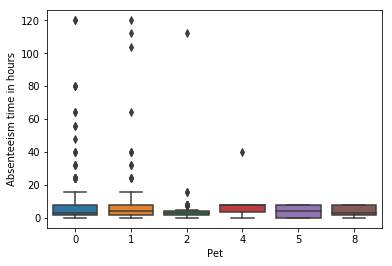

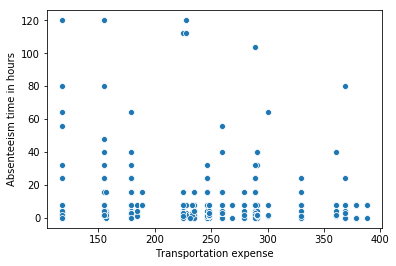

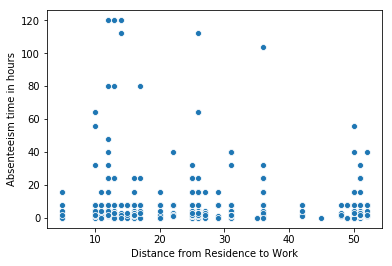

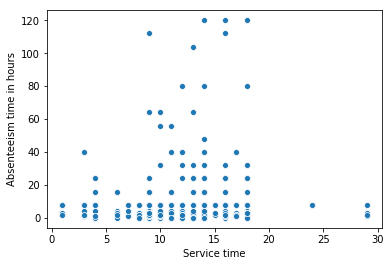

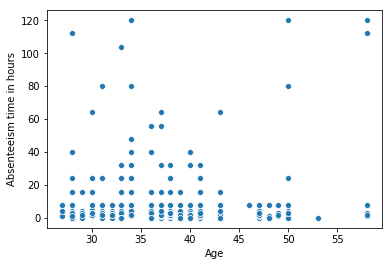

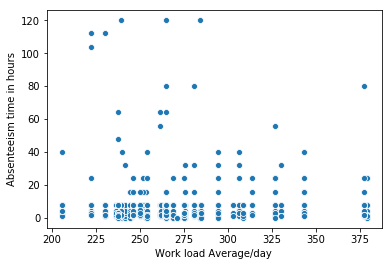

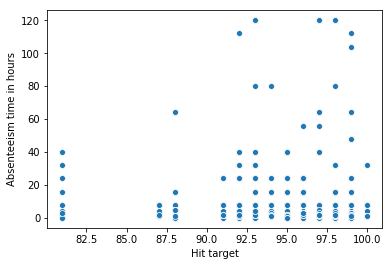

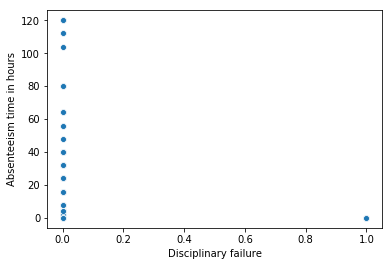

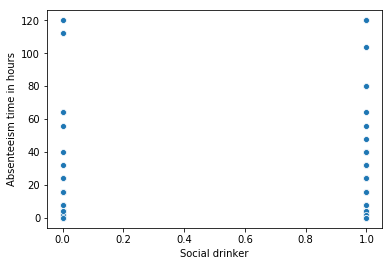

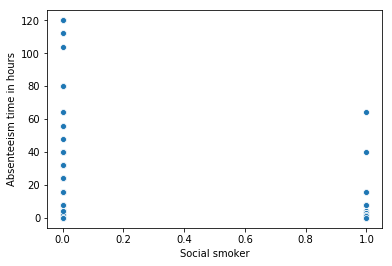

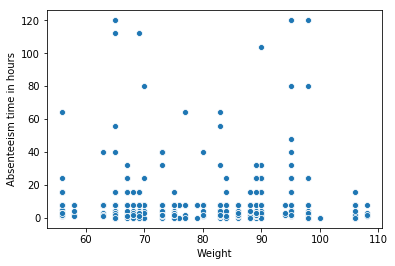

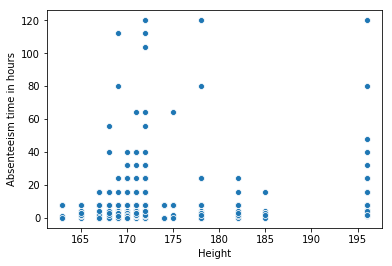

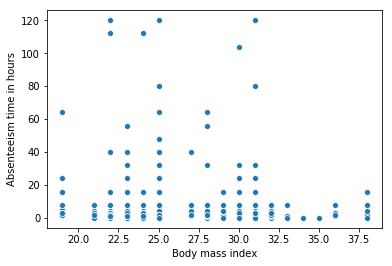

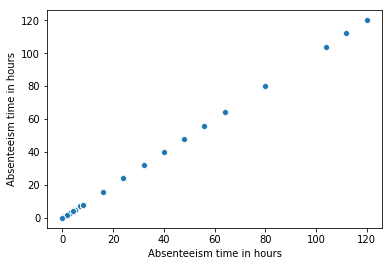

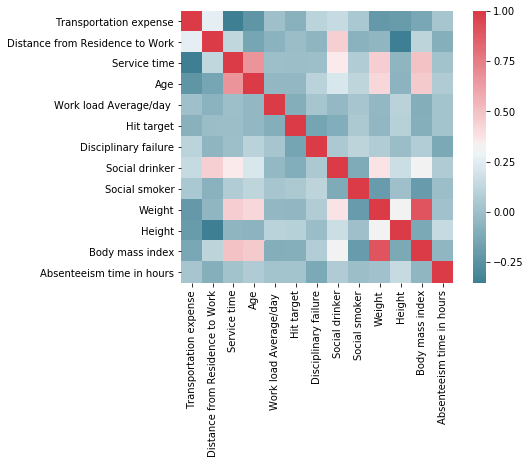

In [73]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def read_data():
    raw_data_path=os.path.join(os.path.pardir,'data','raw','Absenteeism_at_work.csv')
    df=pd.read_csv(raw_data_path,sep=';')
    cat_cols=['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
           'Seasons', 'Education','Son', 'Pet']
    num_cols=[ 'Transportation expense', 'Distance from Residence to Work',
           'Service time', 'Age', 'Work load Average/day ', 'Hit target',
           'Disciplinary failure', 'Social drinker',
           'Social smoker', 'Weight', 'Height', 'Body mass index',
           'Absenteeism time in hours']
    return df,cat_cols,num_cols
def bar_plots(df,cat_cols):
    for i in cat_cols:
        df[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.show()
def histograms(df,num_cols):
    for i in num_cols:
        df[i].plot(kind='hist')
        plt.xlabel(i)
        plt.show()
def boxplots(df,cat_cols,num_cols):
    for i in num_cols:
        df[i].plot(kind='box')
        plt.show()
    for i in cat_cols:
        sns.boxplot(x=df[i],y=df['Absenteeism time in hours'])
        plt.show()
def scatterplots(df,num_cols):
    for i in num_cols:
        sns.scatterplot(x=df[i],y=df['Absenteeism time in hours'])
        plt.show()
def correlation_plot(df,num_cols):
    f, ax = plt.subplots(figsize=(7, 5))
    #Generate correlation matrix
    corr = df[num_cols].corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
if __name__=='__main__':
    df,cat_cols,num_cols=read_data()
    bar_plots(df,cat_cols)
    histograms(df,num_cols)
    boxplots(df,cat_cols,num_cols)
    scatterplots(df,num_cols)
    correlation_plot(df,num_cols)

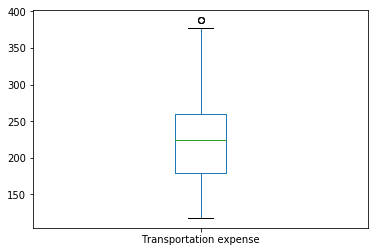

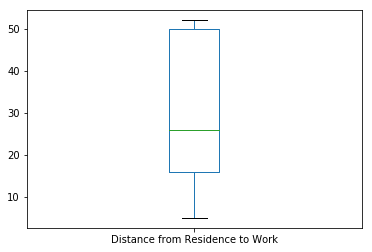

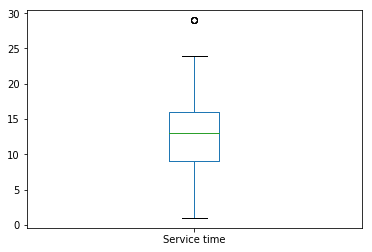

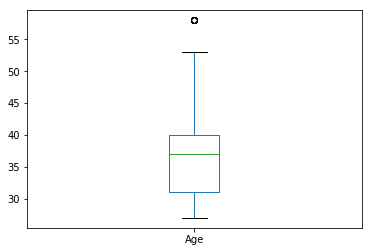

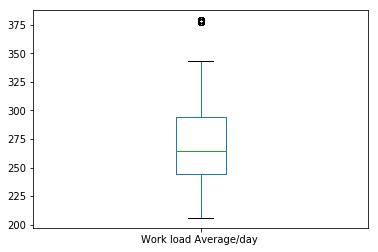

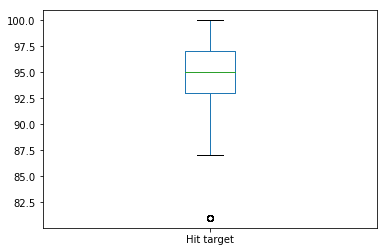

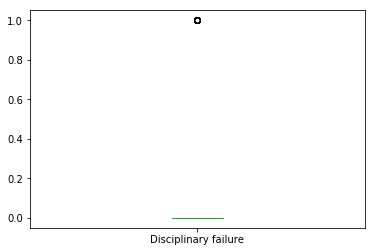

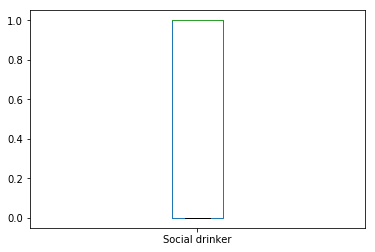

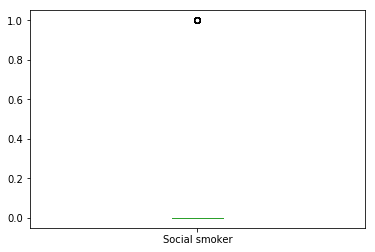

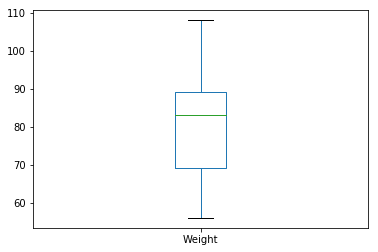

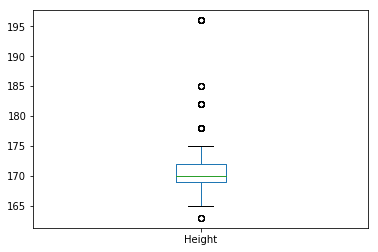

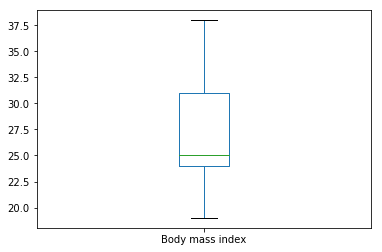

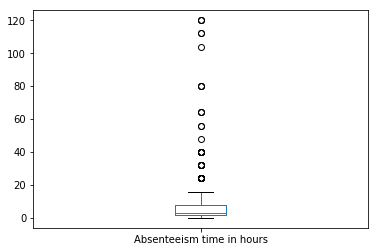

KeyError: 'ID'

In [71]:
boxplots(df,cat_cols,num_cols)

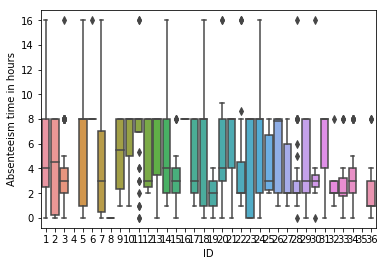

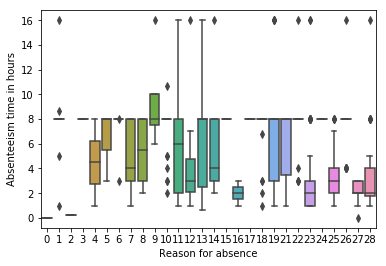

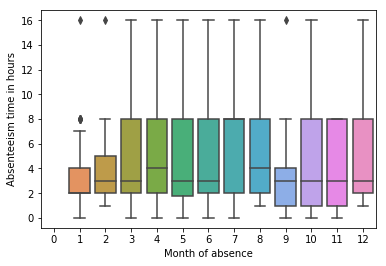

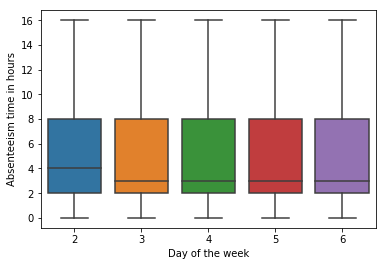

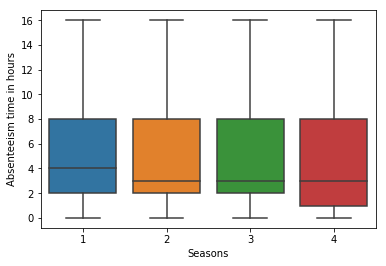

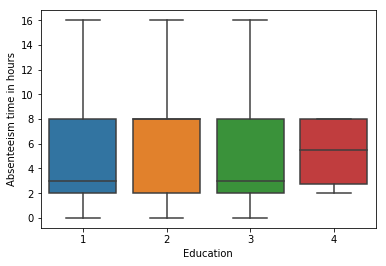

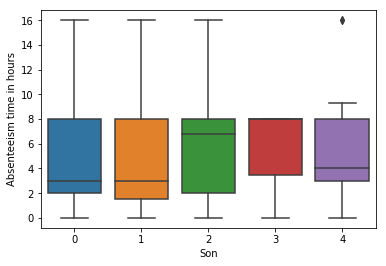

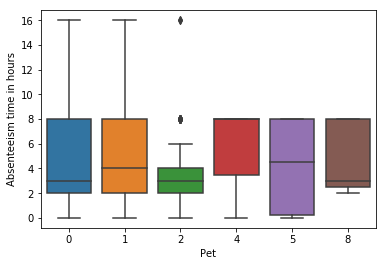

In [72]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df_f['Absenteeism time in hours'])
    plt.show()